In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

In [12]:
np.random.seed(23)

In [13]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)



In [14]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [16]:
fig = px.scatter_3d(df, x=df['feature1'],y=df['feature2'],z=df['feature3'], color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGray')),selector=dict(mode='markers'))

fig.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [21]:
# find covariance matrix

covariance_martrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print(covariance_martrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [35]:
#  finding eigen vectors and eigen values

eigen_values, eigen_vectors = np.linalg.eig(covariance_martrix)

In [36]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [37]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


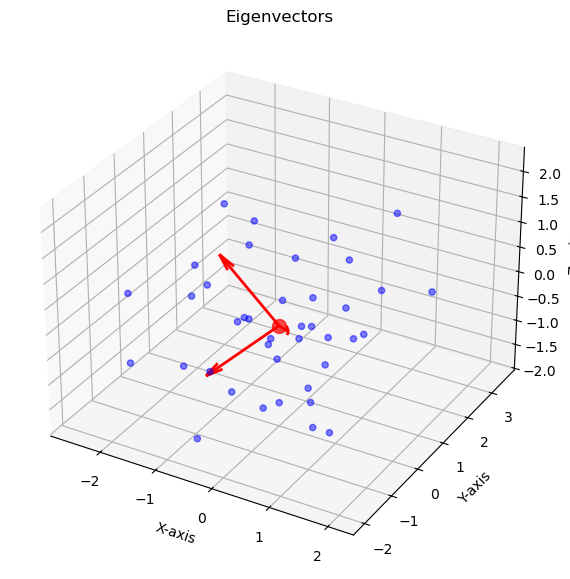

In [38]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], marker='o', color='blue', alpha=0.5)

# Mean point (Red)
mean_x, mean_y, mean_z = df[['feature1', 'feature2', 'feature3']].mean()
ax.scatter(mean_x, mean_y, mean_z, marker='o', color='red', alpha=0.7, s=100)

# Plot Eigenvectors using quiver (replacing Arrow3D)
for i in range(3):
    ax.quiver(
        mean_x, mean_y, mean_z,  # Origin
        eigen_vectors[0, i], eigen_vectors[1, i], eigen_vectors[2, i],  # Direction
        color="red", linewidth=2, length=1.5, arrow_length_ratio=0.2
    )

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('Eigenvectors')

plt.show()


In [39]:

pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [40]:

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [41]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     